In [1]:
import pandas as pd
import plotly.express as px
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [ ]:
pip install worldcloud

<h2><b>TextBlob</b></h2>

This is a Python library that helps you work with text.

It makes it easy to analyze the sentiment of sentences (whether they are positive, negative, or neutral), correct spelling, and translate text between languages.

<b>Why is it important</b>

It's easy to use and provides helpful tools for Natural Language Processing (NLP).

You can quickly analyze how people feel about a review, message, or comment.

<h2><b>WordCloud</b></h2>

This library helps you create a visual representation of text data.

It shows the most frequently used words in bigger sizes, so you can easily see which words are common in a set of reviews or articles.

<b>Why is it important</b>

It makes text analysis visually appealing and easy to understand.

You can quickly see which words appear most often in a large amount of text.

<h2><b>STOPWORDS</b></h2>

These are common words (like "and," "the," "is") that don't add much meaning to the analysis.

The STOPWORDS list helps remove these unnecessary words when creating a word cloud or analyzing text.

<b>Why is it important</b>

By removing stopwords, you focus on the more meaningful words in your text data.

<b>Why are These Libraries Useful</b>

TextBlob helps you understand how people feel about the text (positive, negative, or neutral).

WordCloud gives you a quick visual summary of what people are talking about by showing word importance.

Together, they help you perform text analysis in a simple and visually interesting way, making it easier to understand text data.

In [2]:
sentiment_df = pd.read_csv("mobile_reviews_Mock_Data.csv")

In [3]:
sentiment_df.head()

,Time of Review,User ID,Brief Review
0,8/22/2022 14:16,User1,extremely satisfied with my new mobile phone
1,7/7/2023 14:16,User2,Nice design and sleek look.
2,2/26/2023 14:16,User3,Nice design and sleek look.
3,4/13/2023 14:16,User4,Good value for money.
4,5/25/2023 14:16,User5,Disappointed


In [6]:
sentiment_df.sample(20)

,Time of Review,User ID,Brief Review
11483,6/1/2023 14:16,User11484,Display quality needs improvement.
21234,11/16/2022 14:16,User21235,Impressive performance.
76349,5/6/2023 14:16,User76350,Not worth of Money
56,9/5/2022 14:16,User57,Great product!
24315,5/15/2023 14:16,User24316,Highly recommended!
2106,1/10/2023 14:16,User2107,quite disappointed with this mobile phone
45264,2/27/2023 14:16,User45265,Impressive performance.
60770,10/26/2022 14:16,User60771,Nice design and sleek look.
15470,12/3/2022 14:16,User15471,Very Good Product
85463,1/9/2023 14:16,User85464,Nice design and sleek look.


<b>Polarity</b>

This tells how positive or negative the sentence is.

It ranges from -1 (very negative) to 1 (very positive).

0.0 means the sentence is neutral (neither positive nor negative).

<b>Subjectivity</b>

This shows if the sentence is factual or an opinion.

It ranges from 0 (completely factual) to 1 (completely opinionated).

0.0 here means the sentence is seen as a fact, not an opinion.


The sentence “India is a Country” is neutral (not positive or negative).

It’s treated as a fact, not someone's opinion.

In [8]:
TextBlob("India is a Country").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [9]:
TextBlob(sentiment_df["Brief Review"][0]).sentiment.polarity

0.3181818181818182

In [ ]:
TextBlob("India is a Country").sentiment
TextBlob(sentiment_df["Brief Review"][0]).sentiment.polarity

In [10]:
def indentify_polarity(text):
    return TextBlob(text).sentiment.polarity

In [11]:
sentiment_df["Polarity"] = sentiment_df["Brief Review"].apply(indentify_polarity)

In [12]:
sentiment_df.head()

,Time of Review,User ID,Brief Review,Polarity
0,8/22/2022 14:16,User1,extremely satisfied with my new mobile phone,0.318182
1,7/7/2023 14:16,User2,Nice design and sleek look.,0.600000
2,2/26/2023 14:16,User3,Nice design and sleek look.,0.600000
3,4/13/2023 14:16,User4,Good value for money.,0.700000
4,5/25/2023 14:16,User5,Disappointed,-0.750000


In [13]:
def review_type(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity > 0:
        return "Positive"
    else:
        return "Neutral"

In [14]:
sentiment_df["Review Type"] = sentiment_df["Polarity"].apply(review_type)

In [15]:
sentiment_df.head()

,Time of Review,User ID,Brief Review,Polarity,Review Type
0,8/22/2022 14:16,User1,extremely satisfied with my new mobile phone,0.318182,Positive
1,7/7/2023 14:16,User2,Nice design and sleek look.,0.600000,Positive
2,2/26/2023 14:16,User3,Nice design and sleek look.,0.600000,Positive
3,4/13/2023 14:16,User4,Good value for money.,0.700000,Positive
4,5/25/2023 14:16,User5,Disappointed,-0.750000,Negative


In [19]:
sentiment_df[sentiment_df["Review Type"] == "Neutral"]

,Time of Review,User ID,Brief Review,Polarity,Review Type
15,3/7/2023 14:16,User16,Display quality needs improvement.,0.0,Neutral
22,10/9/2022 14:16,User23,storage capacity is insufficient,0.0,Neutral
23,4/24/2023 14:16,User24,I regret purchasing this mobile phone,0.0,Neutral
30,3/28/2023 14:16,User31,device often freezes or crashes,0.0,Neutral
34,10/1/2022 14:16,User35,device often freezes or crashes,0.0,Neutral
...,...,...,...,...,...
99931,9/3/2022 14:16,User99932,Durability is a concern.,0.0,Neutral
99958,5/19/2023 14:16,User99959,Display quality needs improvement.,0.0,Neutral
99976,1/13/2023 14:16,User99977,Overpriced for the features.,0.0,Neutral
99990,3/14/2023 14:16,User99991,Overpriced for the features.,0.0,Neutral


In [20]:
count_review_df = sentiment_df.groupby("Review Type")["User ID"].count().reset_index()
count_review_df

,Review Type,User ID
0,Negative,16111
1,Neutral,10330
2,Positive,73559


In [21]:
count_review_df.rename(columns = {"User ID":"Count of Users"},inplace = True)

In [22]:
count_review_df

,Review Type,Count of Users
0,Negative,16111
1,Neutral,10330
2,Positive,73559


In [25]:
fig=px.bar(count_review_df,x='Review Type',y='Count of Users', color='Review Type', template='plotly_dark')
fig.update_layout (width=800,title=dict (text="Sentiment Analysis of User Reviews", x=0.5))
fig.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [26]:
neg_review_df = sentiment_df[sentiment_df["Review Type"] == "Negative"]
neg_review_df.head()

,Time of Review,User ID,Brief Review,Polarity,Review Type
4,5/25/2023 14:16,User5,Disappointed,-0.75,Negative
6,10/13/2022 14:16,User7,quite disappointed with this mobile phone,-0.75,Negative
9,6/30/2023 14:16,User10,Slow customer support.,-0.30,Negative
10,7/30/2022 14:16,User11,Disappointed,-0.75,Negative
11,7/10/2023 14:16,User12,Waste,-0.20,Negative


In [28]:
pos_review_df = sentiment_df[sentiment_df["Review Type"] == "Positive"]
pos_review_df.sample(20)

,Time of Review,User ID,Brief Review,Polarity,Review Type
83299,12/6/2022 14:16,User83300,extremely satisfied with my new mobile phone,0.318182,Positive
87089,8/1/2022 14:16,User87090,extremely satisfied with my new mobile phone,0.318182,Positive
7002,9/21/2022 14:16,User7003,Nice design and sleek look.,0.600000,Positive
77629,12/24/2022 14:16,User77630,Nice design and sleek look.,0.600000,Positive
25326,12/8/2022 14:16,User25327,Fast delivery.,0.200000,Positive
11080,8/29/2022 14:16,User11081,Excellent,1.000000,Positive
30758,1/13/2023 14:16,User30759,Awesome,1.000000,Positive
34118,10/5/2022 14:16,User34119,Impressive performance.,1.000000,Positive
37340,3/23/2023 14:16,User37341,Excellent,1.000000,Positive
3421,7/12/2023 14:16,User3422,Impressive performance.,1.000000,Positive


In [33]:
neg_review_text = ''.join(neg_review_df["Brief Review"])
pos_review_text = ''.join(pos_review_df["Brief Review"])
all_review_text = ''.join(sentiment_df["Brief Review"])

In [30]:
print(neg_review_text)

Disappointedquite disappointed with this mobile phoneSlow customer support.DisappointedWasteDisappointedLimited storage capacity.WasteLimited storage capacity.DisappointedLimited storage capacity.DisappointedLimited storage capacity.quite disappointed with this mobile phonecamera performance in low-light conditions is subpar, which is disappointingcamera performance in low-light conditions is subpar, which is disappointingquite disappointed with this mobile phonequite disappointed with this mobile phoneHorribleSlow customer support.Limited storage capacity.camera performance in low-light conditions is subpar, which is disappointingcamera performance in low-light conditions is subpar, which is disappointingDisappointedDisappointedLimited storage capacity.Limited storage capacity.Limited storage capacity.HorribleHorribleDisappointedDisappointedLimited storage capacity.camera performance in low-light conditions is subpar, which is disappointingDisappointedquite disappointed with this mobi

In [35]:
print(pos_review_text)

extremely satisfied with my new mobile phoneNice design and sleek look.Nice design and sleek look.Good value for money.The Best MobileGreat product!Impressive performance.Easy to use and user-friendly interface.top-notch choice for anyone.Impressive performance.Excellent camera quality.Impressive performance.Excellent camera quality.Great product!Excellent camera quality.extremely satisfied with my new mobile phoneExcellent camera quality.Good value for money.Good value for money.Highly recommended!Very Good ProductGood value for money.Great product!Good value for money.Battery life could be better.Fast delivery.top-notch choice for anyone.Good value for money.extremely satisfied with my new mobile phoneThe Best Mobiletop-notch choice for anyone.extremely satisfied with my new mobile phoneFast delivery.Very Good ProductExcellent camera quality.Very Good ProductGreat product!extremely satisfied with my new mobile phoneBattery life could be better.Fast delivery.Impressive performance.Ver


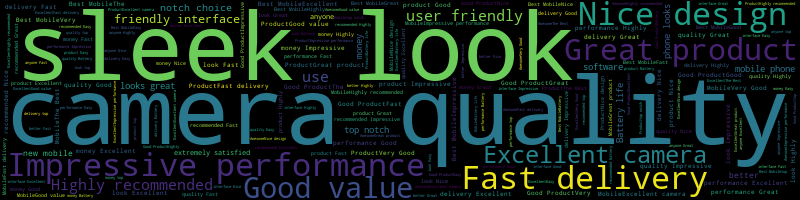

In [38]:
stopwords = STOPWORDS

pos_wordcloud = WordCloud(stopwords=stopwords,width = 800).generate(pos_review_text)
fig = px.imshow(pos_wordcloud,template = 'plotly_dark')
fig.update_layout(xaxis_visible = False,yaxis_visible = False)
fig.show()

stopwords = STOPWORDS:

Removes common words (like "the," "and") from the text.

WordCloud()

Creates a word cloud of the most frequent words from the positive reviews (pos_review_text).

px.imshow()

Displays the word cloud using Plotly, with a dark theme ('plotly_dark').

fig.update_layout(xaxis_visible = False):

Hides the X-axis to keep the focus on the word cloud.

fig.show():

Shows the word cloud.


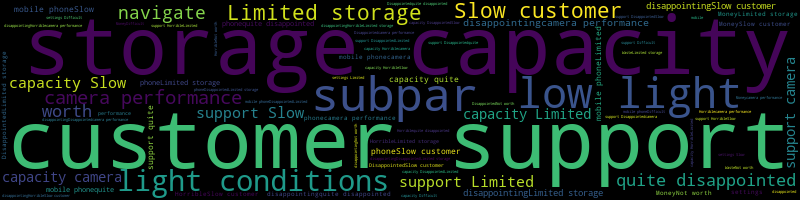

In [39]:
neg_wordcloud = WordCloud(stopwords=stopwords,width = 800).generate(neg_review_text)
fig = px.imshow(neg_wordcloud,template = 'plotly_dark')
fig.update_layout(xaxis_visible = False)
fig.show()


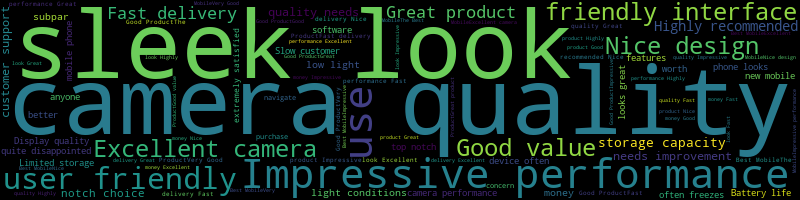

In [40]:
all_wordcloud = WordCloud(stopwords=stopwords,width = 800).generate(all_review_text)
fig = px.imshow(all_wordcloud,template = 'plotly_dark')
fig.update_layout(xaxis_visible = False)
fig.show()